In [1]:
from keras.layers import Input, Dense
from keras.models import Model

import numpy as np
from sklearn.cross_validation import train_test_split
import random
import matplotlib.pyplot as plt

import os
from glob import glob
import json

import cv2

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
txt = open('./data_dir_190209.txt', 'r')
d_json = txt.read()
data_dir = json.loads(d_json)

In [ ]:
#img = cv2.imread(data_dir['train'][0], 0)/255

In [3]:
img_size = [44, 60]

In [5]:
x_train = np.zeros((len(data_dir['train']), img_size[0], img_size[1]))
x_valid = np.zeros((len(data_dir['valid']), img_size[0], img_size[1]))
x_test = np.zeros((len(data_dir['test']), img_size[0], img_size[1]))

In [23]:
for i in range(len(data_dir['train'])):
    x_train[i,:,:]  = cv2.imread(data_dir['train'][i], 0)/255
    
for i in range(len(data_dir['valid'])):
    x_valid[i,:,:]  = cv2.imread(data_dir['valid'][i], 0)/255
    
for i in range(len(data_dir['test'])):
    x_test[i,:,:]  = cv2.imread(data_dir['test'][i], 0)/255

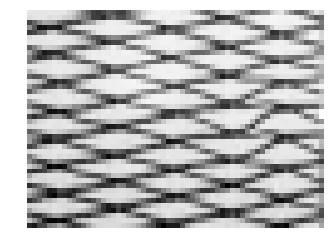

In [24]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(width, height))
plt.axis("off")
plt.imshow(x_test[32], cmap='gray')
plt.show()

In [ ]:
num_pix = 60*44
encoding_dim = 200

input_img = Input(shape=(num_pix,))
encoded = Dense(encoding_dim, activation='sigmoid')(input_img)
decoded = Dense(num_pix, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))